In [1]:
## ------------------------------------------------------------------------
library(raster)
library(rgdal)
library(dismo)
library(maptools)
library("readxl")
data(wrld_simpl)
#library(raster)
## ------------------------------------------------------------------------

Warning message:
"package 'raster' was built under R version 3.6.3"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Warning message:
"package 'rgdal' was built under R version 3.6.3"rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: C:/Users/falco/anaconda3/Lib/R/library/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: C:/Users/falco/anaconda3/Lib/R/library/rgdal/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.
Overwritten PROJ_LIB was C:/Users/falco/anaconda3/Lib/R/library/rgdal/proj
Warning message:
"package 'dismo' was built under R version 3.6.3"Warning m

In [3]:
help(getData)

In [8]:
#install.packages(c("Rcpp"), type = "binary")

In [9]:
setwd("C:/Users/falco/Desktop/directory/Python-species-distribution-modeling/")

In [10]:
#install.packages(c("raster", "rgdal", "dismo", "maptools", "readxl", "wrld_simpl"), type = "binary")

In [11]:
# pipe GBIF data
jt_raw <- read_excel('data/0078016-220831081235567/0078016-220831081235567.xlsx', ) # grab GBIF
jt_raw <- jt_raw[which(jt_raw$countryCode=='UG'),] # restrict to Uganda
jt <- data.frame(matrix(ncol = 2, nrow = length(jt_raw$decimalLongitude)))
jt[,1] <- jt_raw$decimalLongitude
jt[,2] <- jt_raw$decimalLatitude
jt <- unique(jt) # xantusia without duplicates
jt <- jt[complete.cases(jt),] # remove na's
colnames(jt) <- c('lon','lat')

In [12]:
#Africa <- getData("GADM", country = "AFRICA", level = 1)

In [13]:
# download Bioclim features
#e <- extent(leftX,RightX,BottomY,UpperY) # set study area extent for all data
#e <- extent(-18,52,-36,37) # set study area extent for all data
e <- extent(28,35,-1.5,4.3) # set study area extent for uganda
jt <- jt[which(jt$lon>=e[1] & jt$lon<=e[2]),] # remove presences beyond extent
jt <- jt[which(jt$lat>=e[3] & jt$lat<=e[4]),] # remove presences beyond extent
# use dismo's getData to grab climate features
bioclim.data <- getData(name = "worldclim",
                        var = "bio",
                        res = 2.5,
                        path = "data/")
bioclim.data <- crop(bioclim.data, e*1.25)  # crop to bg point extent
# write rasters to /data folder
for (i in c(1:19)){
  writeRaster(bioclim.data[[i]], paste('data/bclim', i, sep = ''),
              format="ascii", overwrite=TRUE)
}


In [14]:
length_presences = dim(jt)[1]

In [15]:
dim(jt_raw)

[1] 16 50

In [16]:
# sample background points from a slightly wider extent
bg <- randomPoints(bioclim.data[[1]], length_presences*4, ext=e, extf = 1.25) 
colnames(bg) <- c('lon','lat')
train <- rbind(jt, bg)  # combine with presences
pa_train <- c(rep(1, nrow(jt)), rep(0, nrow(bg))) # col of ones and zeros
train <- data.frame(cbind(CLASS=pa_train, train)) # final dataframe

In [17]:
# create spatial points
crs <- crs(bioclim.data[[1]])
train <- train[sample(nrow(train)),]
class.pa <- data.frame(train[,1])
colnames(class.pa) <- 'CLASS'
dataMap.jt  <- SpatialPointsDataFrame(train[,c(2,3)], class.pa,
                                      proj4string =crs)

In [20]:
# write as shp
writeOGR(dataMap.jt, 'data/Thr_gre.shp','Thr_gre', driver='ESRI Shapefile')

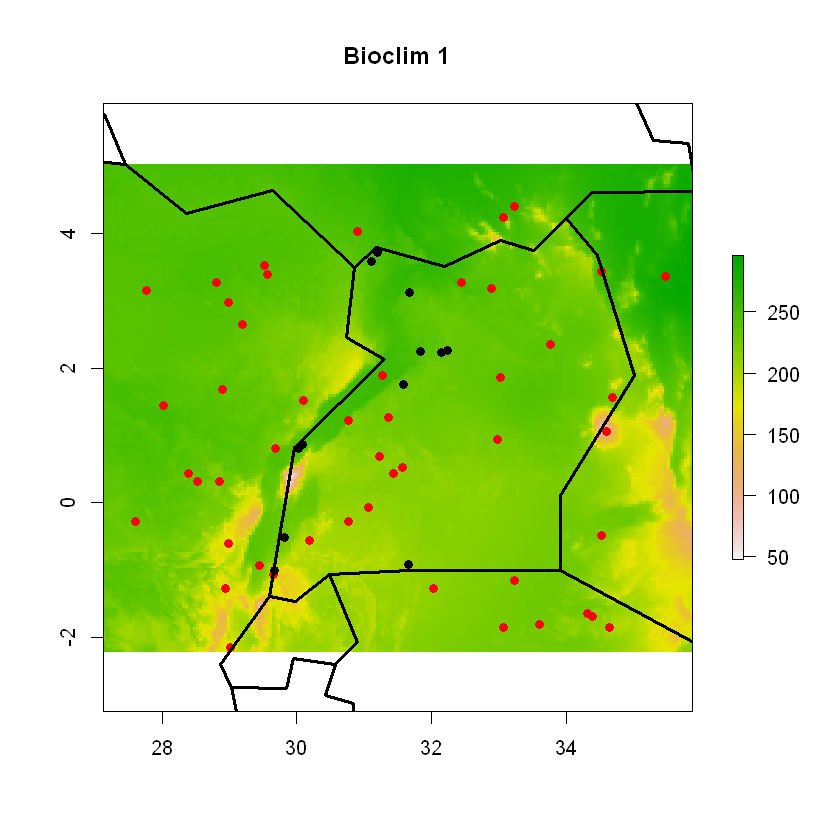

In [21]:
# plot our points
plot(bioclim.data[[1]], main='Bioclim 1')
points(bg, col='red', pch = 16,cex=1)
points(jt, col='black', pch = 16,cex=1)
plot(wrld_simpl, add=TRUE, border='black', lwd=3)

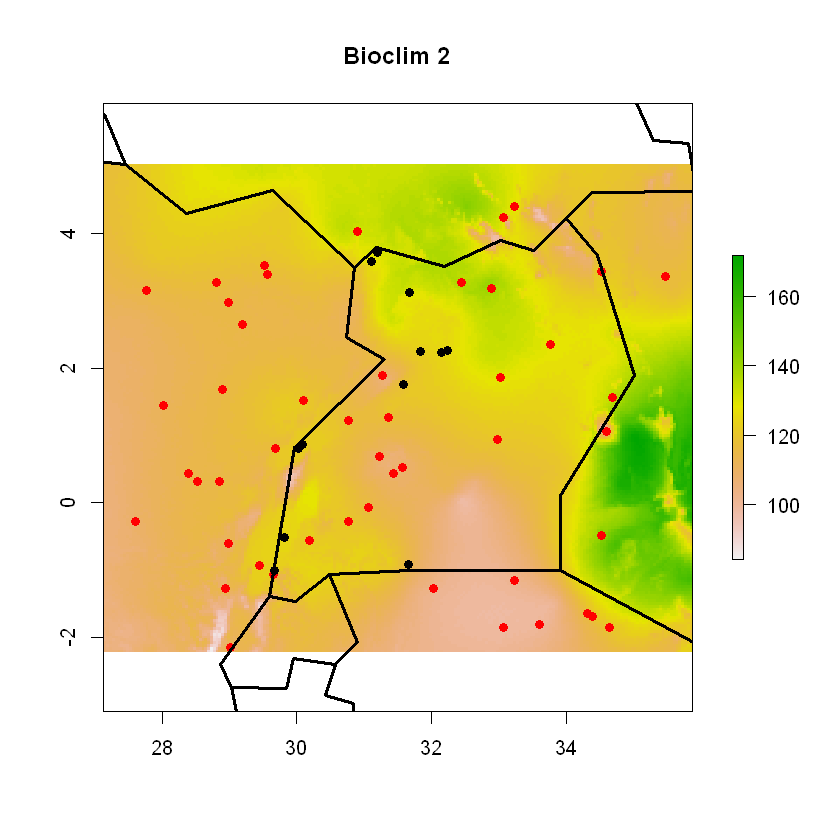

In [22]:
# plot our points
plot(bioclim.data[[2]], main='Bioclim 2')
points(bg, col='red', pch = 16,cex=1)
points(jt, col='black', pch = 16,cex=1)
plot(wrld_simpl, add=TRUE, border='black', lwd=3)

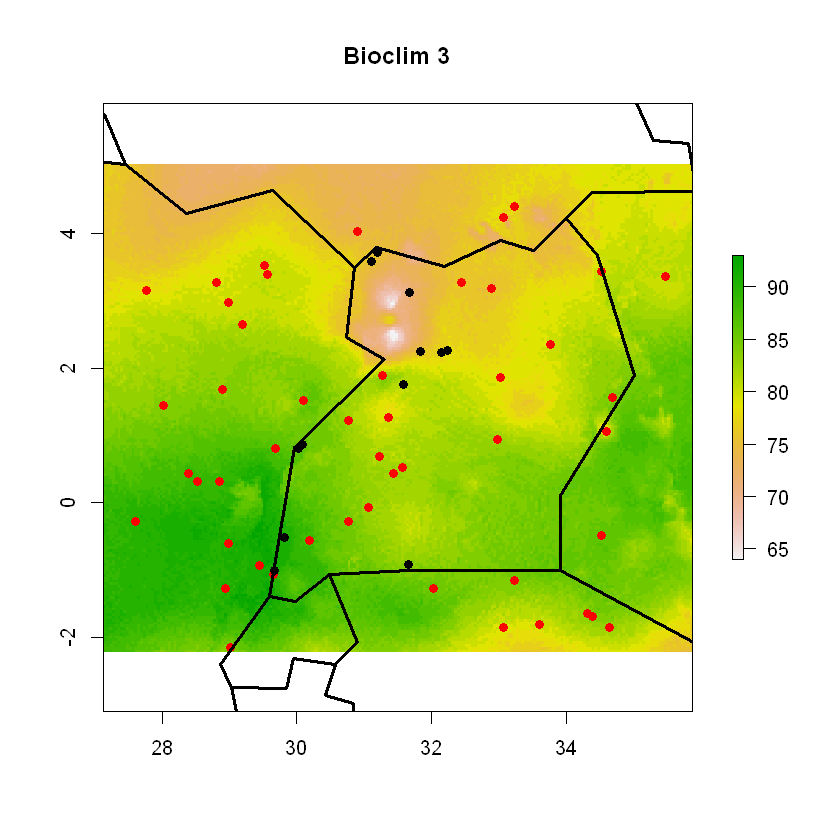

In [23]:
# plot our points
plot(bioclim.data[[3]], main='Bioclim 3')
points(bg, col='red', pch = 16,cex=1)
points(jt, col='black', pch = 16,cex=1)
plot(wrld_simpl, add=TRUE, border='black', lwd=3)

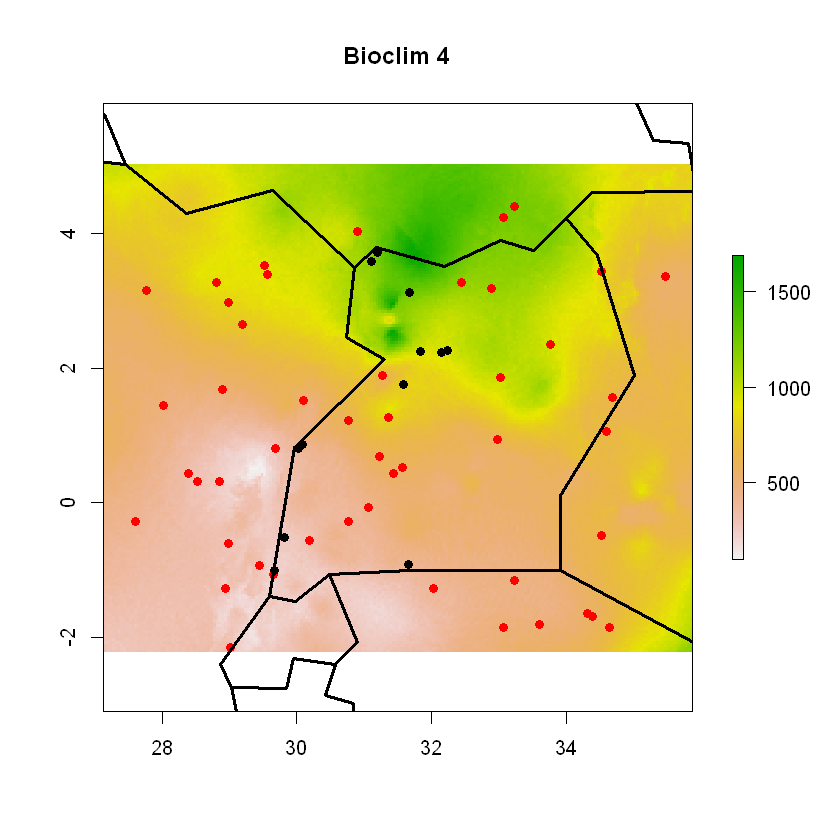

In [24]:
# plot our points
plot(bioclim.data[[4]], main='Bioclim 4')
points(bg, col='red', pch = 16,cex=1)
points(jt, col='black', pch = 16,cex=1)
plot(wrld_simpl, add=TRUE,border='black', lwd=3)

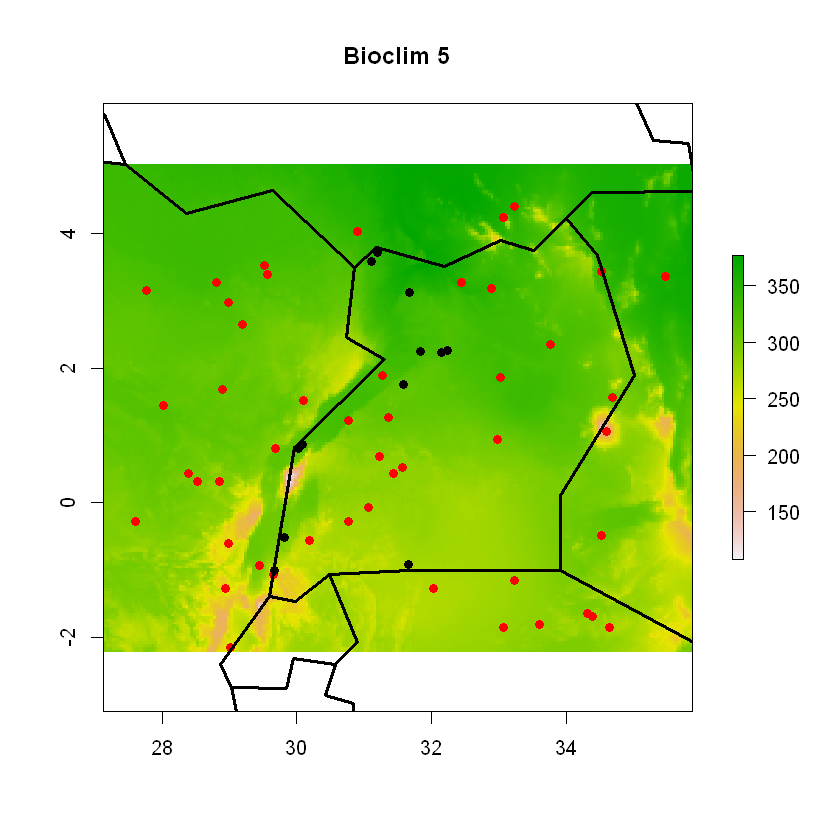

In [25]:
# plot our points
plot(bioclim.data[[5]], main='Bioclim 5')
points(bg, col='red', pch = 16,cex=1)
points(jt, col='black', pch = 16,cex=1)
plot(wrld_simpl, add=TRUE, border='black', lwd=3)

In [26]:
bioclim.data[[5]]

class      : RasterLayer 
dimensions : 174, 210, 36540  (nrow, ncol, ncell)
resolution : 0.04166667, 0.04166667  (x, y)
extent     : 27.125, 35.875, -2.208333, 5.041667  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
source     : memory
names      : bio5 
values     : 108, 377  (min, max)


In [27]:
bioclim.data[[5]]

class      : RasterLayer 
dimensions : 174, 210, 36540  (nrow, ncol, ncell)
resolution : 0.04166667, 0.04166667  (x, y)
extent     : 27.125, 35.875, -2.208333, 5.041667  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
source     : memory
names      : bio5 
values     : 108, 377  (min, max)


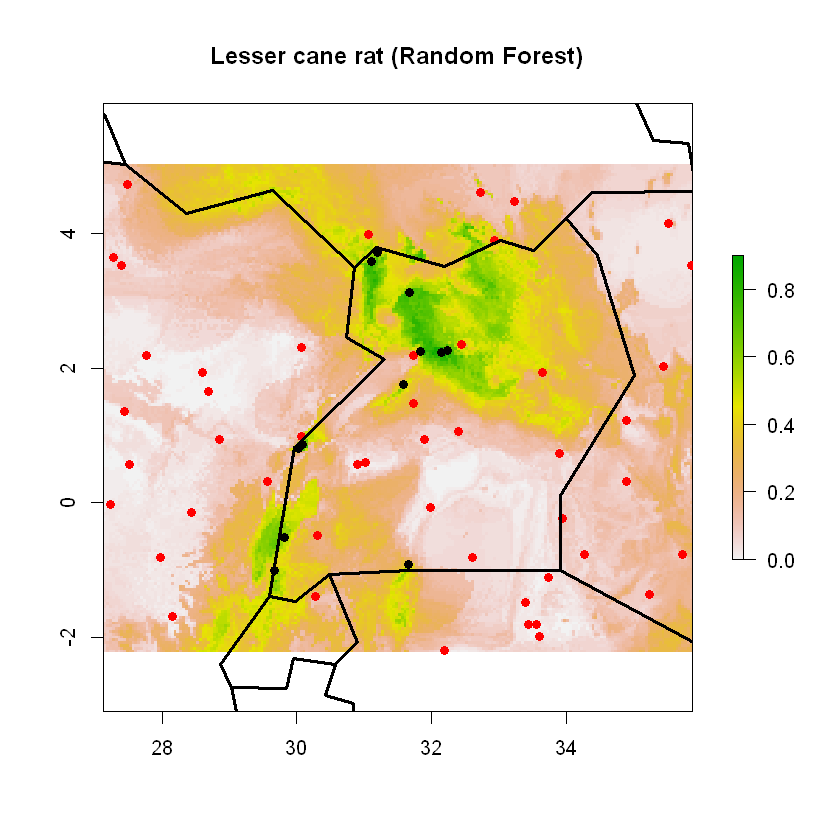

In [22]:
DEM <- raster("outputs/rf-images/probability_1.0.tif")
plot(DEM, main='Lesser cane rat (Random Forest)')
points(bg, col='red', pch = 16,cex=1)
points(jt, col='black', pch = 16,cex=1)
plot(wrld_simpl, add=TRUE, border='black', lwd=3)

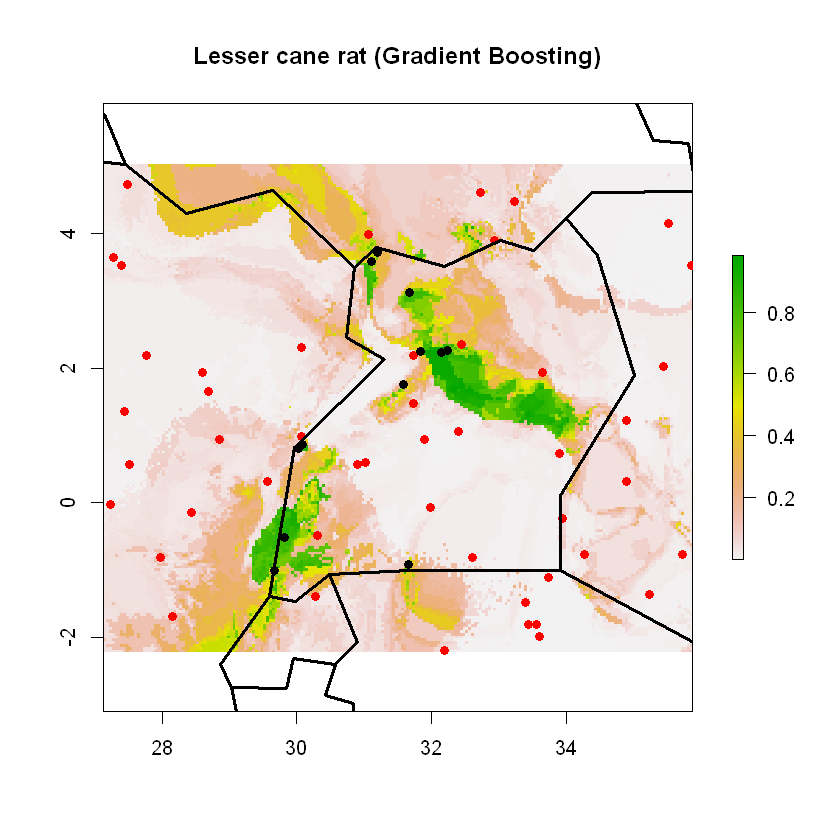

In [23]:
DEM <- raster("outputs/xgb-images//probability_1.0.tif")
plot(DEM, main='Lesser cane rat (Gradient Boosting)')
points(bg, col='red', pch = 16,cex=1)
points(jt, col='black', pch = 16,cex=1)
plot(wrld_simpl, add=TRUE, border='black', lwd=3)

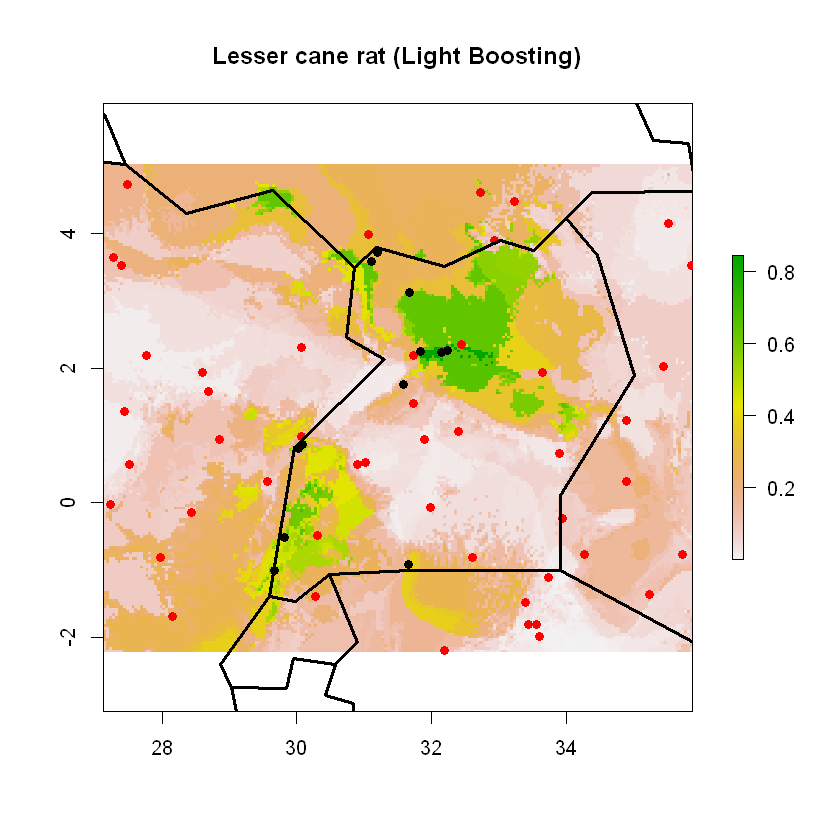

In [24]:
DEM <- raster("outputs/lgbm-images//probability_1.0.tif")
plot(DEM, main='Lesser cane rat (Light Boosting)')
points(bg, col='red', pch = 16,cex=1)
points(jt, col='black', pch = 16,cex=1)
plot(wrld_simpl, add=TRUE, border='black', lwd=3)

DEM <- raster("outputs/lgbm-images/probability_1.0.tif")
plot(DEM, main='PREDICTION Light boost')
points(bg, col='red', pch = 16,cex=1)
points(jt, col='black', pch = 16,cex=1)
plot(wrld_simpl, add=TRUE, border='black', lwd=3)

DEM <- raster("outputs/xgb-images/probability_1.0.tif")
plot(DEM, main='PREDICTION XGboost')
points(bg, col='red', pch = 16,cex=1)
points(jt, col='black', pch = 16,cex=1)
plot(wrld_simpl, add=TRUE, border='black', lwd=3)